# HW1 - Data Exploration and Preparation

#### imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.spatial import distance
from plot3d import plot3d
from visualize_clf import visualize_clf

%matplotlib inline

#### Utility functions

In [2]:
def plot_box(series, title, xlabel):
    cleaned_series = series.dropna()
    plt.figure(figsize=(8, 6))
    plt.boxplot(cleaned_series, vert=False)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

## P1 -  Data Loading and First Look

### Loading the dataset

#### Q1 - shape

In [3]:
dataset = pd.read_csv('virus_data.csv')
dataset.shape

(1250, 24)

#### Q2 - value-count

In [4]:
dataset.value_counts('conversations_per_day')

conversations_per_day
2     214
4     212
3     208
5     158
6     101
1     100
7      76
8      73
10     32
9      23
12     14
13     13
11     10
14      7
15      3
17      2
18      2
16      1
22      1
Name: count, dtype: int64

#### Q3 - columns analysis

In [5]:
dataset.columns

Index(['patient_id', 'age', 'sex', 'weight', 'blood_type', 'num_of_siblings',
       'happiness_score', 'conversations_per_day', 'sugar_levels',
       'sport_activity', 'pcr_date', 'household_income', 'PCR_03', 'PCR_01',
       'PCR_02', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09',
       'PCR_10', 'spread', 'risk'],
      dtype='object')

In [6]:
dataset.head(3) # here we wanted to check what types of values are there for each column :)

,patient_id,age,sex,weight,blood_type,num_of_siblings,happiness_score,conversations_per_day,sugar_levels,sport_activity,...,PCR_02,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk
0,752,27,M,77.2,A+,1.0,8,3,92,1,...,1.311349,-32.726893,4.467751,165.007823,4.442691,6.948303,-8.798361,6.704059,1,-1
1,957,32,M,80.5,A+,11.0,9,9,90,2,...,-0.484949,110.643771,5.241163,-24.594219,0.823626,9.742164,-6.042282,14.614062,1,1
2,879,40,F,76.6,O+,3.0,11,2,108,1,...,-0.928110,33.926773,14.006449,17.567186,5.521852,9.697282,-13.140928,0.934598,1,1


### Partitioning the data 

#### Q4 - split

In [7]:
id1 = 21
id2 = 9
train = dataset.sample(frac=0.8, random_state=id1 + id2)
test = dataset.drop(train.index)

## P2 - Missing Values and Outliers

#### Q5

In [8]:
def get_missing_data_stats(ds: pd.DataFrame) -> dict:
    """
    Go over the columns of train and test and check for each column how many missing data is there
    Arg: ds - the dataset 
    returns: a list of the names 
    """

    has_nan_columns = {}
    for col_name in ds.columns:
        column = ds[col_name]
        
        nan_mask = pd.isnull(column) # mark for each line if NaN or not
        if nan_mask.any():
            has_nan_columns[col_name] = nan_mask.value_counts()[True]
    return has_nan_columns


print(f'{" ":10}> Train set - missing data')

missing_stats_train = get_missing_data_stats(train)
for col_name, missing in missing_stats_train.items():
    print(f'in column {col_name} - missing: {missing}')   
print('-' * 70)

print(f'{" ":10}> Test set - missing data')

missing_stats_test = get_missing_data_stats(test)
for col_name, missing in missing_stats_test.items():
    print(f'in column {col_name} - missing: {missing}')   
print('-' * 70)

          > Train set - missing data
in column num_of_siblings - missing: 108
in column PCR_03 - missing: 53
----------------------------------------------------------------------
          > Test set - missing data
in column num_of_siblings - missing: 27
in column PCR_03 - missing: 21
----------------------------------------------------------------------


#### Q6

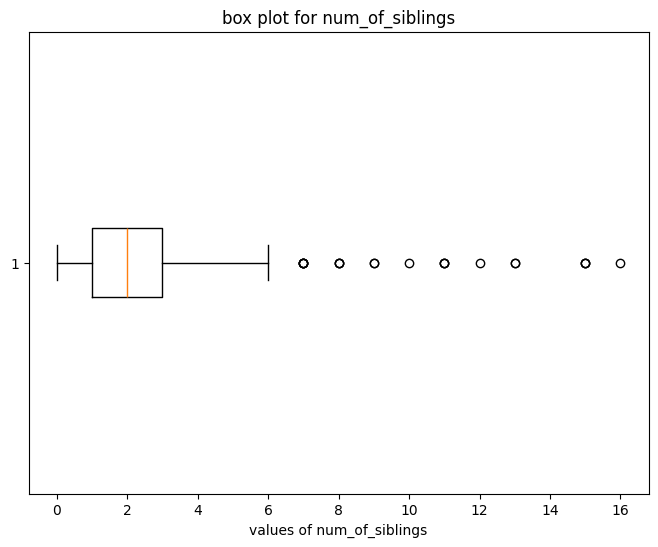

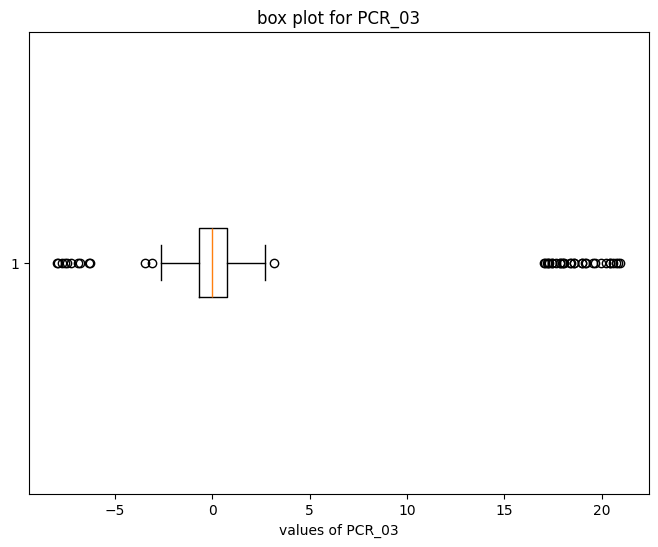

In [9]:
for col_name in missing_stats_train.keys():
    plot_box(train[col_name], f'box plot for {col_name}', f'values of {col_name}')

#### Q7

In [10]:
for col_name in missing_stats_train.keys():
    print(f'The mean of {col_name} is - \t{train[col_name].mean()}')
    print(f'The median of {col_name} is - \t{train[col_name].median()}')

The mean of num_of_siblings is - 	1.9417040358744395
The median of num_of_siblings is - 	2.0
The mean of PCR_03 is - 	0.521187504661258
The median of PCR_03 is - 	-0.0070285297453213


#### Task A

In [11]:
for col_name in missing_stats_train.keys():
    train[col_name].fillna('median')

for col_name in missing_stats_test.keys():
    test[col_name].fillna('median')

## Part 3: Warming up with k-Nearest Neighbors

### Basic data exploration

#### Task B

In [12]:
# create the combinations for the features
opt_featrures = ['PCR_02', 'PCR_03', 'PCR_06', 'PCR_10']
feature_combinations = list(it.combinations(opt_featrures, 2))
feature_combinations

[('PCR_02', 'PCR_03'),
 ('PCR_02', 'PCR_06'),
 ('PCR_02', 'PCR_10'),
 ('PCR_03', 'PCR_06'),
 ('PCR_03', 'PCR_10'),
 ('PCR_06', 'PCR_10')]

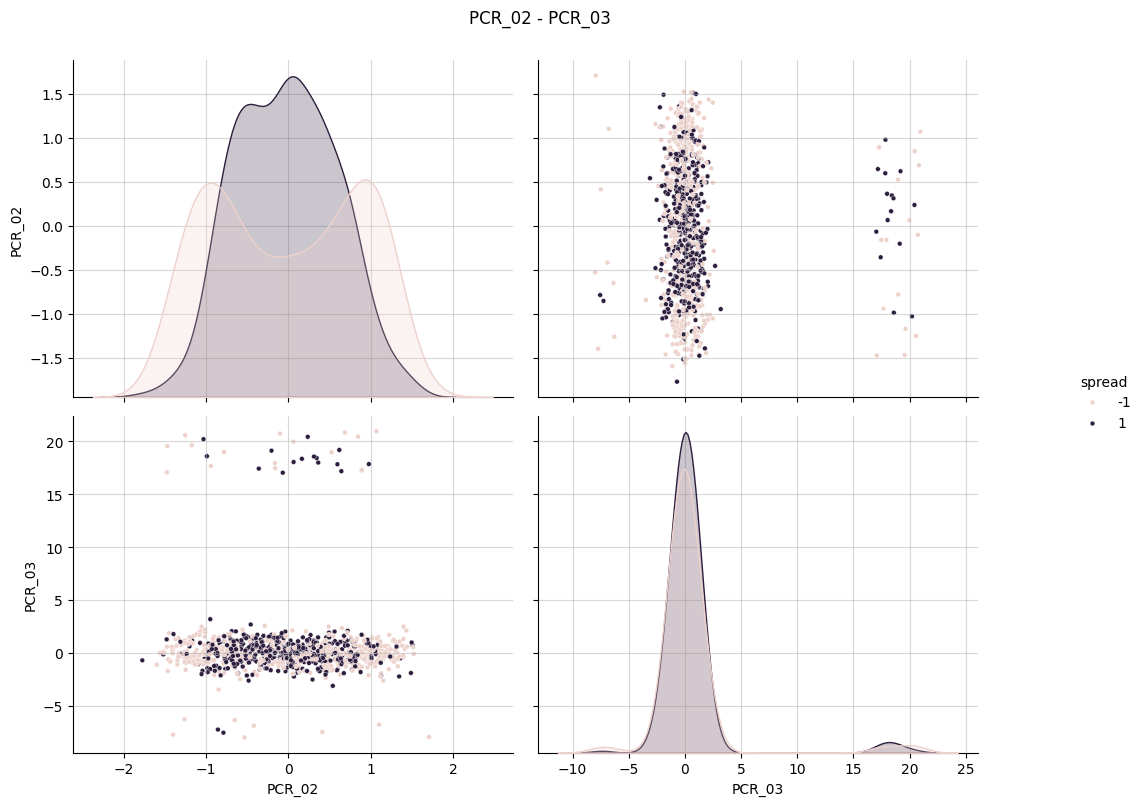

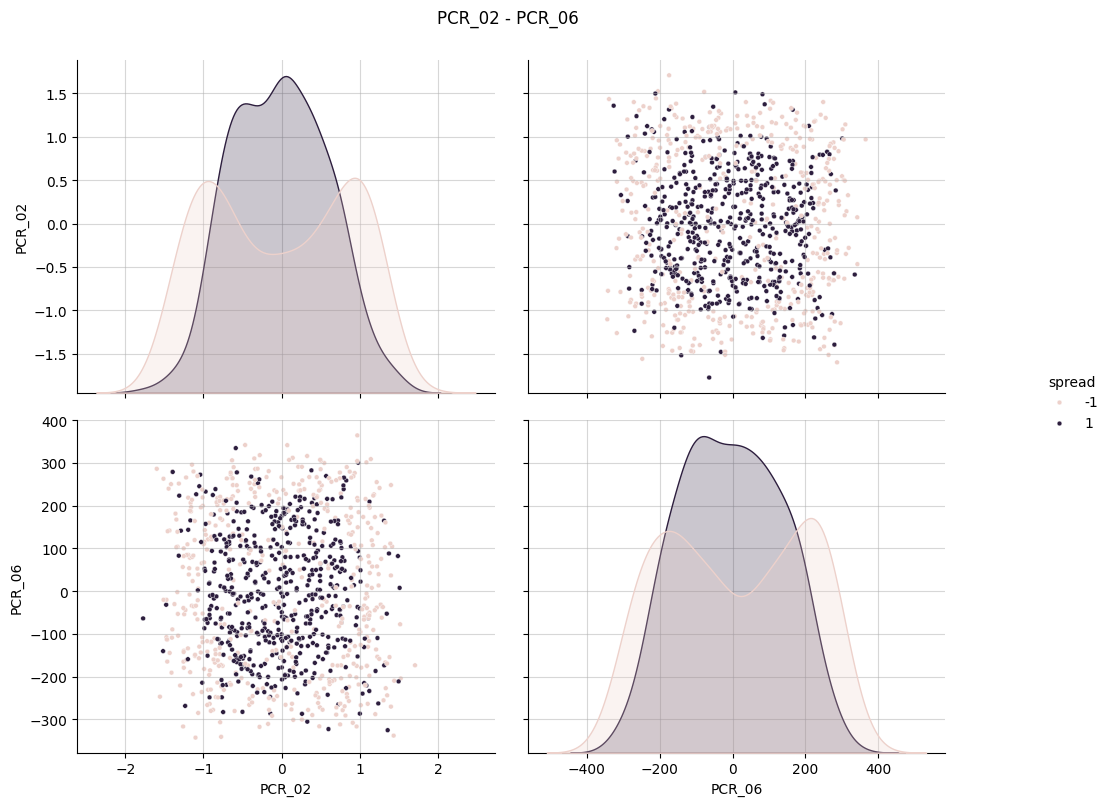

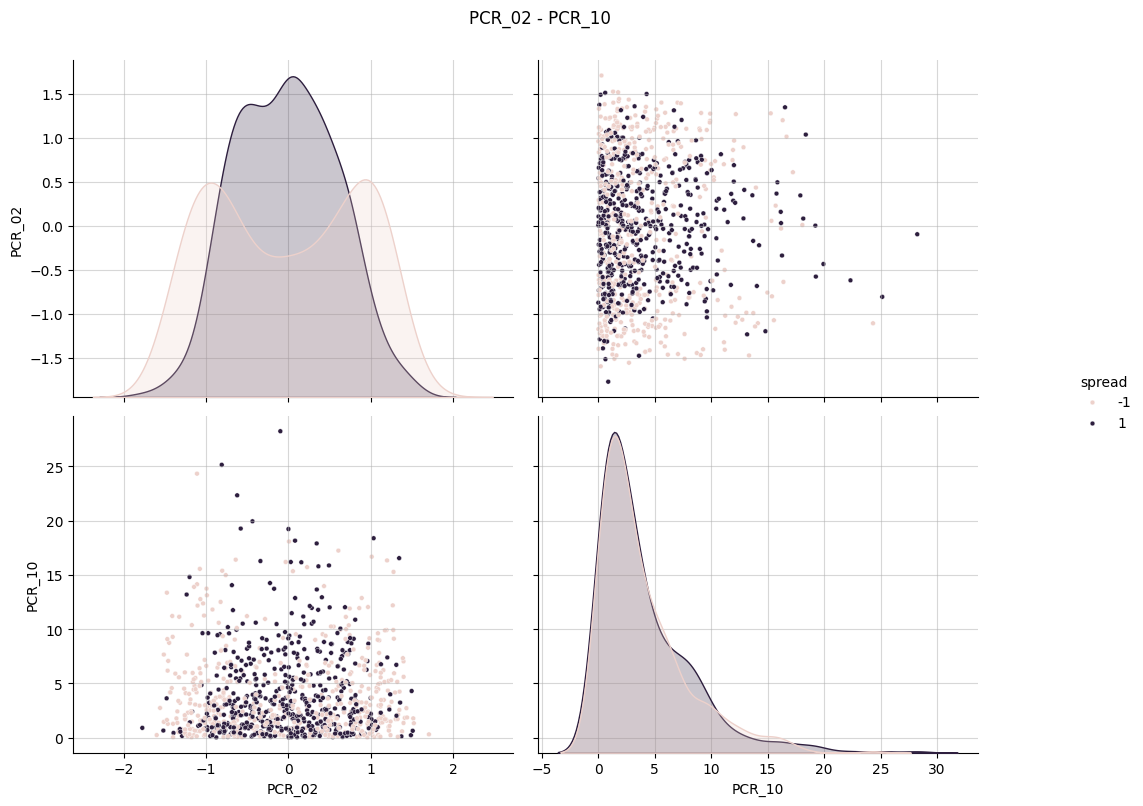

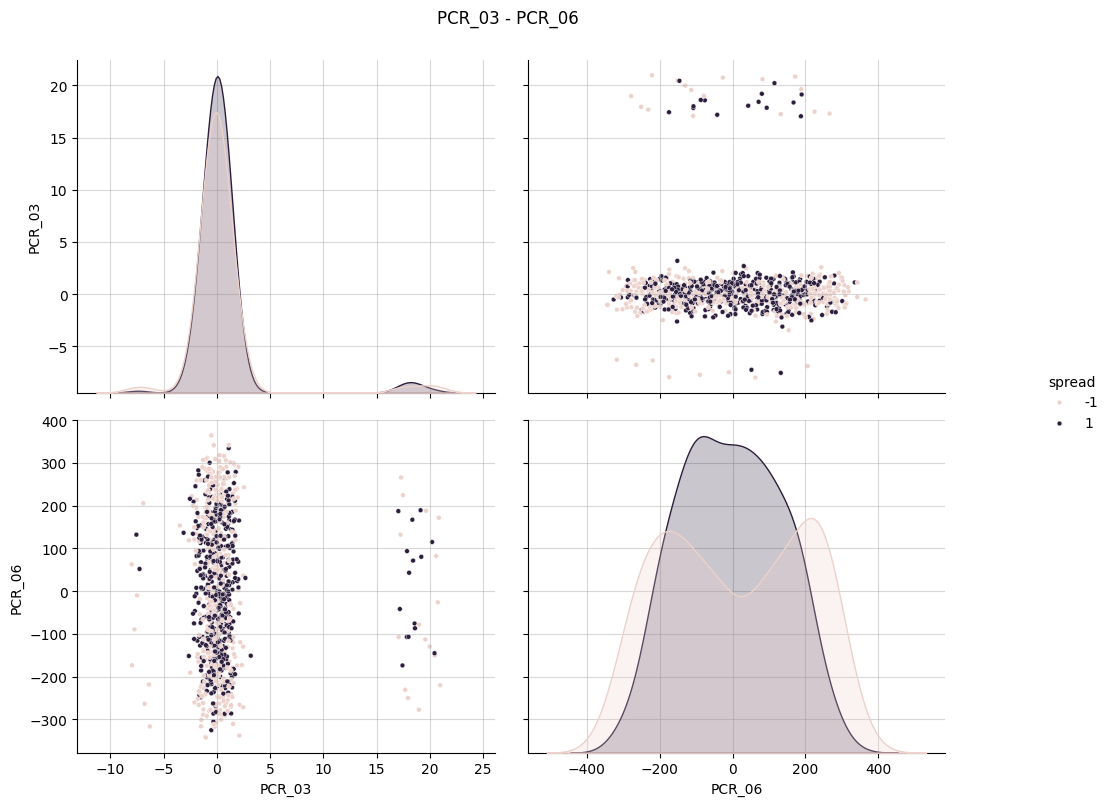

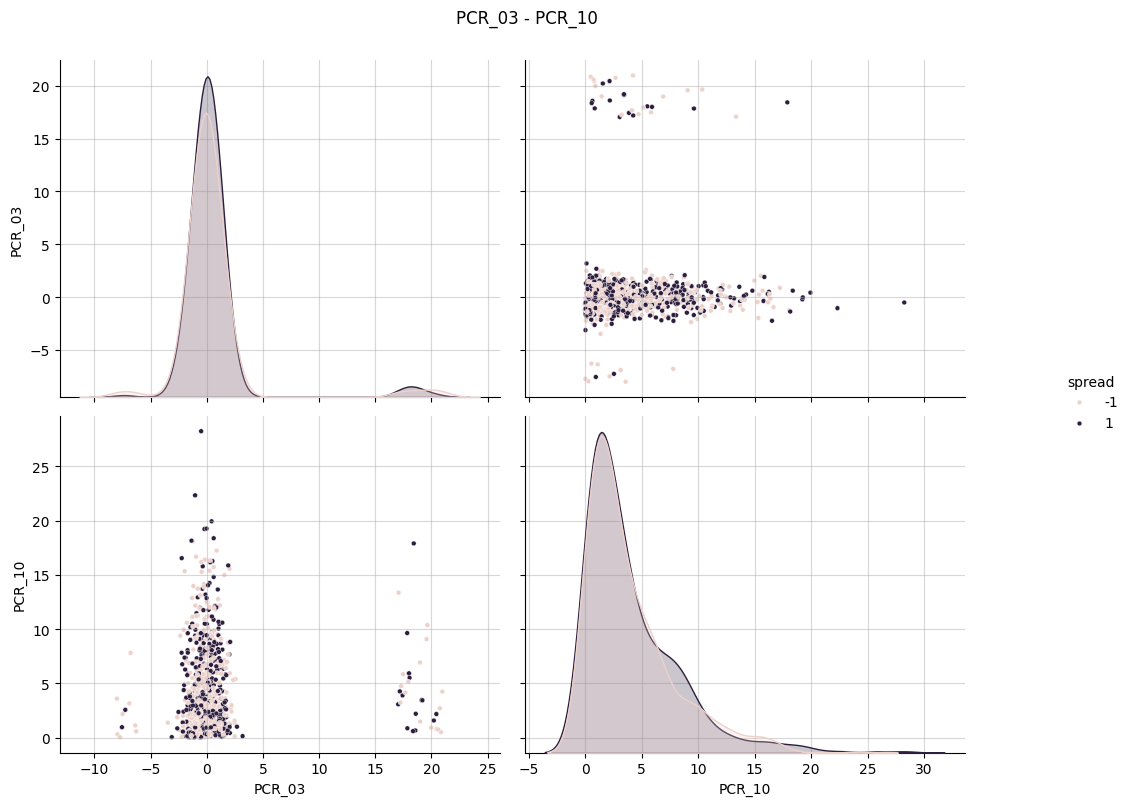

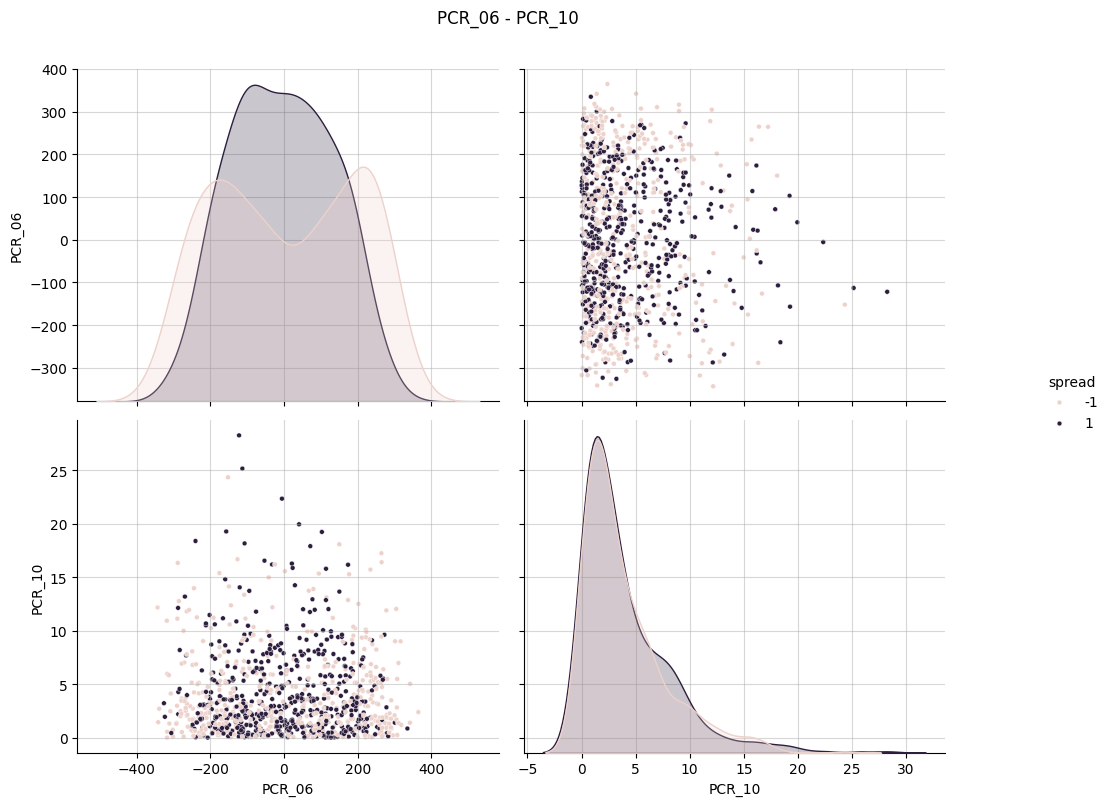

In [13]:
for col1, col2 in feature_combinations:
    data = train[[col1, col2, 'spread']]
    g = sns.pairplot(data, plot_kws={'s': 12}, hue='spread')
    g.fig.suptitle(f'{col1} - {col2}', y=1.04)

    for ax in np.ravel(g.axes):
        ax.grid(alpha=0.5)
    
    g.fig.set_size_inches(12, 8)

#### Q8 - in docx

#### Q9

In [14]:
for col1, col2 in feature_combinations:
    data = train[[col1, col2, 'spread']]
    corr = data.corr()
    print(f'{col1}x{col2} - correlation:\n {corr}')
    print()

PCR_02xPCR_03 - correlation:
           PCR_02    PCR_03    spread
PCR_02  1.000000 -0.003453 -0.005374
PCR_03 -0.003453  1.000000  0.006577
spread -0.005374  0.006577  1.000000

PCR_02xPCR_06 - correlation:
           PCR_02    PCR_06    spread
PCR_02  1.000000 -0.037986 -0.005374
PCR_06 -0.037986  1.000000 -0.038852
spread -0.005374 -0.038852  1.000000

PCR_02xPCR_10 - correlation:
           PCR_02    PCR_10    spread
PCR_02  1.000000  0.003659 -0.005374
PCR_10  0.003659  1.000000  0.015821
spread -0.005374  0.015821  1.000000

PCR_03xPCR_06 - correlation:
           PCR_03    PCR_06    spread
PCR_03  1.000000 -0.014382  0.006577
PCR_06 -0.014382  1.000000 -0.038852
spread  0.006577 -0.038852  1.000000

PCR_03xPCR_10 - correlation:
           PCR_03    PCR_10    spread
PCR_03  1.000000  0.020397  0.006577
PCR_10  0.020397  1.000000  0.015821
spread  0.006577  0.015821  1.000000

PCR_06xPCR_10 - correlation:
           PCR_06    PCR_10    spread
PCR_06  1.000000 -0.010630 -0.038852
P

### k-NN implementation 

#### Task C

In [15]:
class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors: int = 3):
        super().__init__()
        self.n_neighbors = n_neighbors
        self.X = None
        self.y = None

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        return self
    
    def predict(self, X):
        if self.X is None:
            return None
        
        X = np.array(X)
        k = self.n_neighbors

        dists = distance.cdist(self.X, X, metric='euclidean')               # dists_ij = dist(u=XA[i], v=XB[j])
        partition = np.argpartition(dists, kth=k - 1, axis=0)[:k]           # choose for each column k closest
        k_labels = self.y[partition]                                        # choose the labels of the k closest for each point to predict
        predictions = np.sign(np.mean(k_labels, axis=0))                    # calculate the predicted label
        return predictions

#### Q10 - in docx

#### Task D

In [27]:
# choose train set
featrues = ('PCR_06', 'PCR_02')

df_train = train[[*featrues, 'spread']]
X_train = df_train[[*featrues]]
y_train = df_train['spread']

# choose test set
df_test = test[[*featrues, 'spread']]
X_test = df_test[[*featrues]]
y_test = df_test['spread']

#### Q11

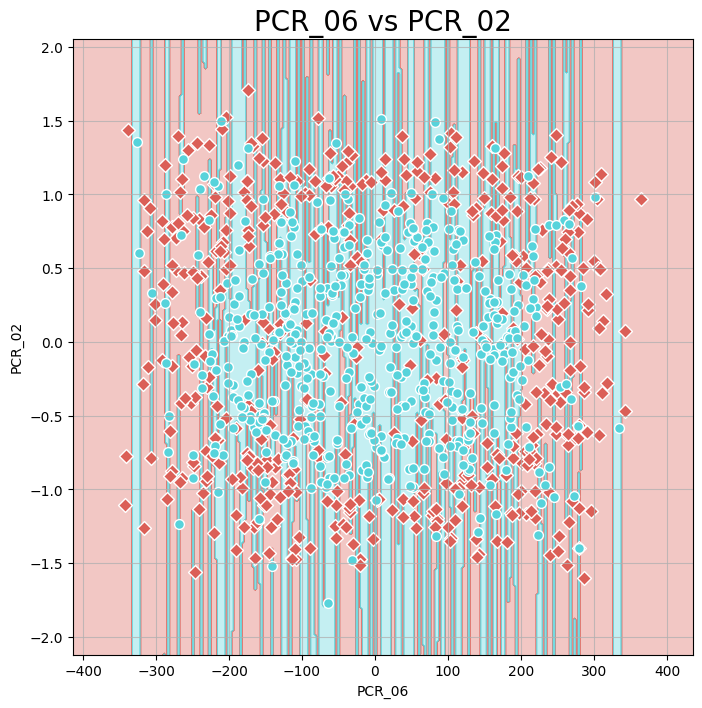

train score: 1.0
test score: 0.608


In [28]:
kNN_62 = kNN(n_neighbors=1)
kNN_62.fit(X_train, y_train)
visualize_clf(kNN_62, X_train, y_train, f'{featrues[0]} vs {featrues[1]}', *featrues)
print(f'train score: {kNN_62.score(X_train, y_train)}')
print(f'test score: {kNN_62.score(X_test, y_test)}')

### Data Normalization

#### Q12

In [29]:
from sklearn.preprocessing import MinMaxScaler

# using the MinMax Scaler of sikit learn to normalize the data into [-1, 1] interval
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)

scaler.fit(X_test)
X_test_norm = scaler.transform(X_test)

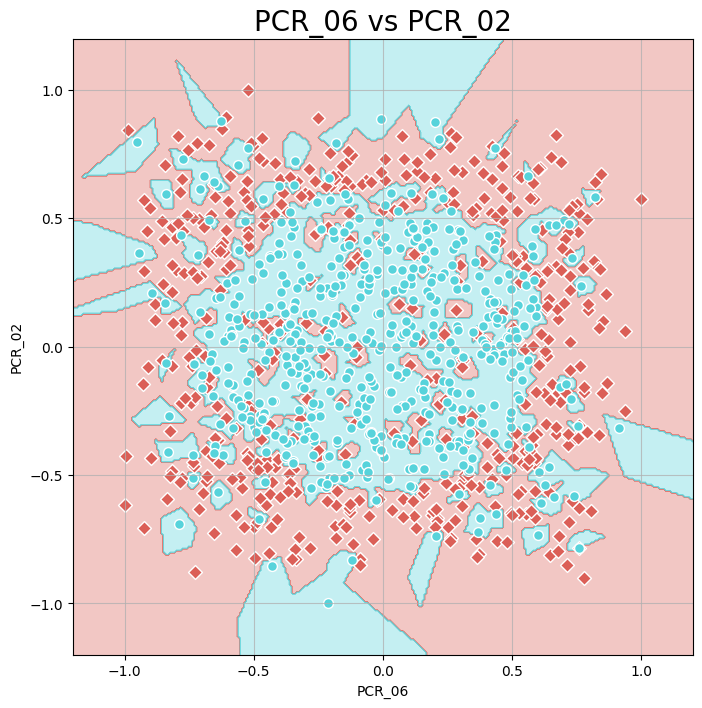

train score: 1.0
test score: 0.648


In [30]:
kNN_62.fit(X_train_norm, y_train)
visualize_clf(kNN_62, X_train_norm, y_train, f'{featrues[0]} vs {featrues[1]}', *featrues)
print(f'train score: {kNN_62.score(X_train_norm, y_train)}')
print(f'test score: {kNN_62.score(X_test_norm, y_test)}')

#### Q13

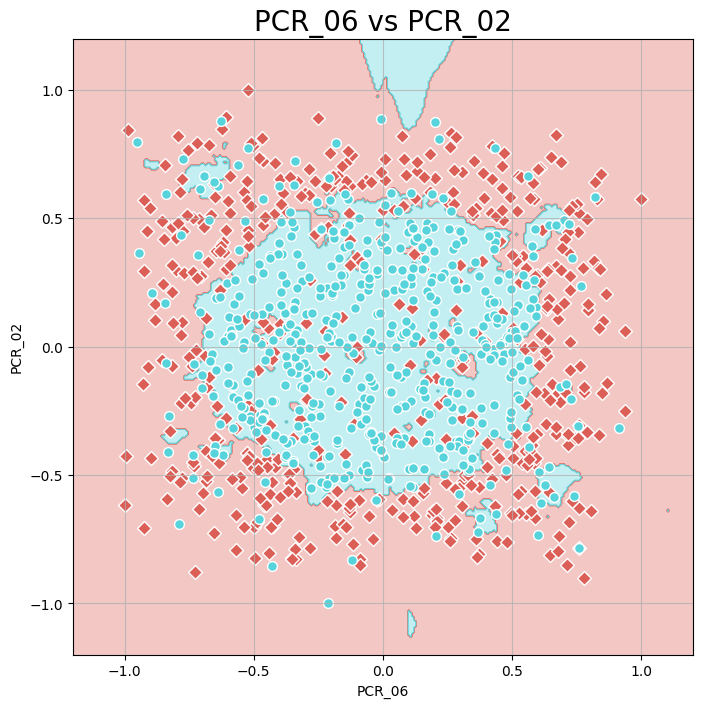

train score: 0.826
test score: 0.708


In [31]:
kNN_62 = kNN(n_neighbors=5)
kNN_62.fit(X_train_norm, y_train)
visualize_clf(kNN_62, X_train_norm, y_train, f'{featrues[0]} vs {featrues[1]}', *featrues)
print(f'train score: {kNN_62.score(X_train_norm, y_train)}')
print(f'test score: {kNN_62.score(X_test_norm, y_test)}')

## Part 4: Data Exploration

#### Task E

In [42]:
# add the special property
dataset['SpecialProperty'] = dataset['blood_type'].isin(['O+', 'B+'])

# remove the blood_type column
dataset = dataset.drop(columns='blood_type')

### Univariate Analysis 

In [54]:
cont_feat = ['weight']

for i in range(1, 10):
    cont_feat.append(f'PCR_0{i}')
cont_feat.append('PCR_10')

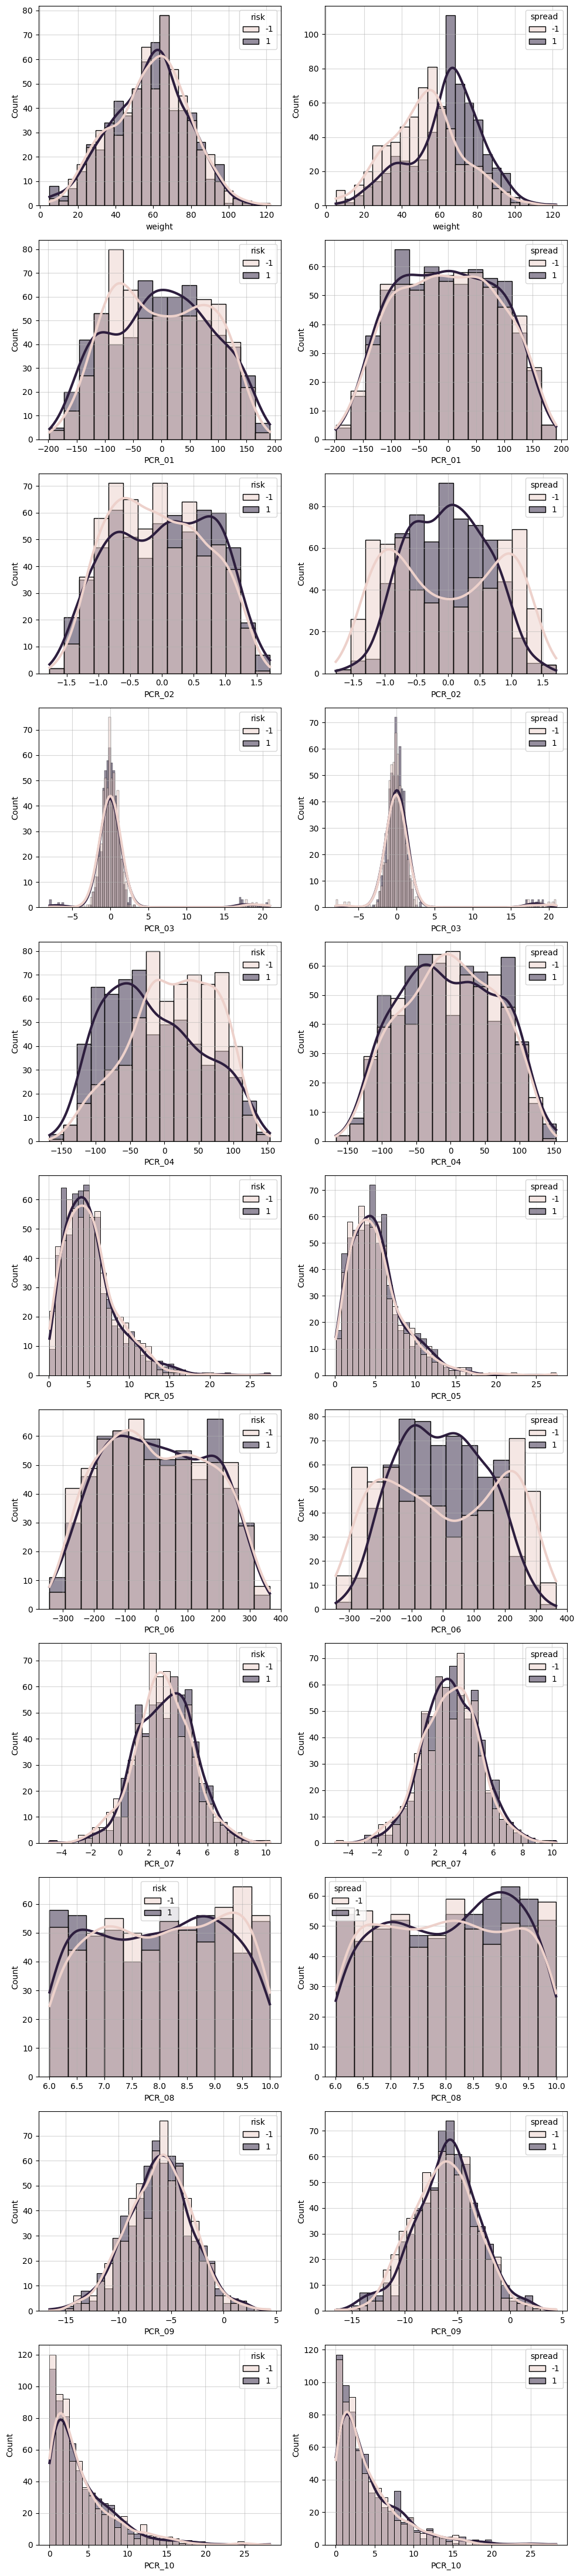

In [58]:
col_names = cont_feat
cols, rows = (2, len(col_names)) 
plt.figure(figsize=(5 * cols, 4 * rows))  

for row in range(rows): 
    column = col_names[row] 
    for j, cls in enumerate(["risk", "spread"]): 
        plt.subplot(rows, cols, row * cols + 1 + j) 
        isContinuous = "float" in dataset[column].dtype.name 
        sns.histplot(data=dataset, x=column, hue=cls, line_kws={"linewidth": 3}, 
                        kde=isContinuous, multiple="layer" if isContinuous else "dodge") 
        plt.grid(alpha=0.5) 
plt.tight_layout()

#### Q15 - in docx

#### Q16 - in docx

#### Bivariate Analysis

#### Q17

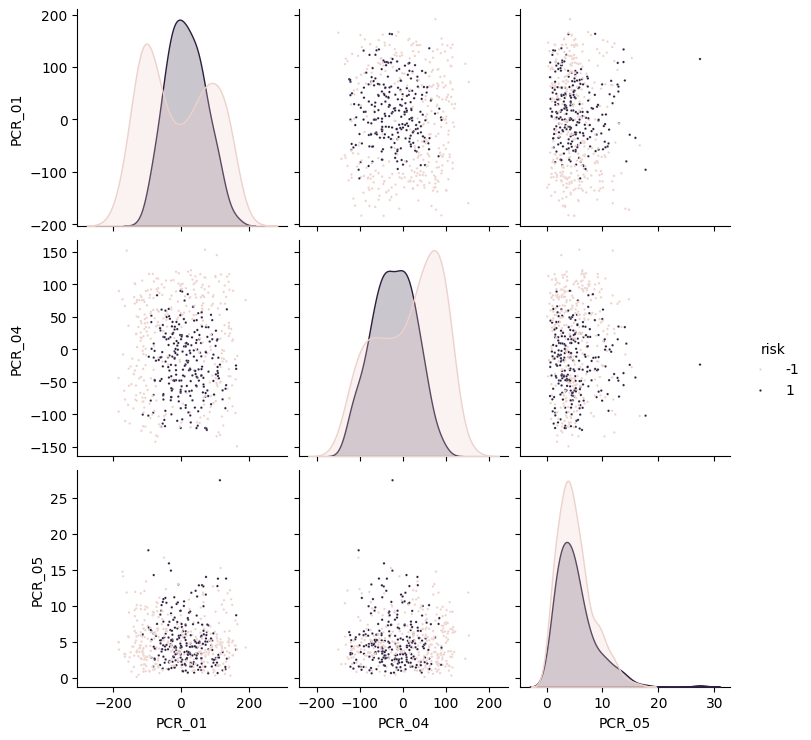

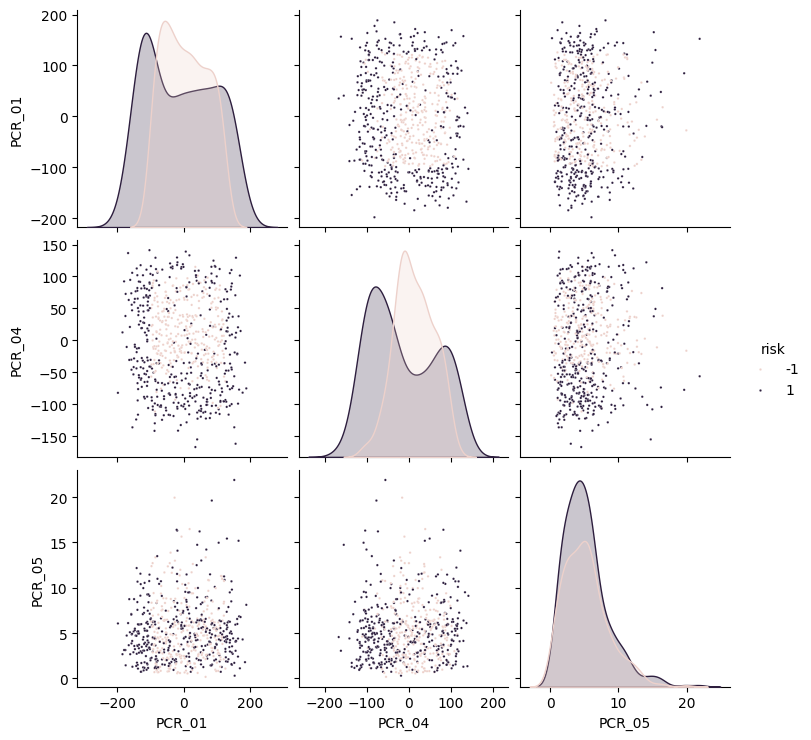

In [65]:
risk_data = dataset[['PCR_01', 'PCR_04', 'PCR_05', 'risk', 'SpecialProperty']]
prop_true_data, prop_false_data = risk_data[mask := risk_data['SpecialProperty']], risk_data[~mask]

sns.pairplot(prop_true_data[prop_true_data.filter(like='PCR').columns.tolist() + ['risk']], plot_kws={'s': 3}, hue='risk')
sns.pairplot(prop_false_data[prop_false_data.filter(like='PCR').columns.tolist() + ['risk']], plot_kws={'s': 3}, hue='risk')